In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import requests
import json
from geopy.distance import geodesic

hdb_resale_prices = pd.read_csv("final_hdb_resale_prices.csv")
final_hdb_resale_prices = pd.read_csv("hdb_model_data.csv")

In [31]:
#https://royleekiat.com/2020/10/22/how-to-predict-hdb-resale-prices-using-3-different-machine-learning-models-linear-regression-neural-networks-k-nearest-neighbours/

In [2]:
hdb_resale_prices.drop(columns=['index'], inplace=True)
hdb_resale_prices.tail()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,Latitude,Longitude,cpi_multiplier,...,year,no.of bto,resale application,demand ratio,remaining_lease_months,address,Distance to nearest MRT,Distance to CBD,Distance to nearest mall,isMatureEstate
143254,2023-01,YISHUN,5 ROOM,8.0,113.0,Improved,680000.0,1.415600,103.842414,1.06406,...,2023,20000,NaN,NaN,1123.0,511B YISHUN ST 51,1068.246379,527.673362,527.673362,0.0
143255,2023-01,YISHUN,5 ROOM,5.0,122.0,Improved,548000.0,1.425795,103.832725,1.06406,...,2023,20000,NaN,NaN,759.0,760 YISHUN ST 72,476.584201,527.673362,527.673362,0.0
143256,2023-01,YISHUN,EXECUTIVE,2.0,145.0,Maisonette,755000.0,1.429031,103.844303,1.06406,...,2023,20000,NaN,NaN,775.0,344 YISHUN AVE 11,1035.784351,527.673362,527.673362,0.0
143257,2023-01,YISHUN,EXECUTIVE,11.0,145.0,Apartment,770000.0,1.429547,103.847279,1.06406,...,2023,20000,NaN,NaN,774.0,387 YISHUN RING RD,1365.944822,527.673362,527.673362,0.0
143258,2023-01,YISHUN,EXECUTIVE,5.0,145.0,Apartment,750000.0,1.429780,103.843057,1.06406,...,2023,20000,NaN,NaN,773.0,328 YISHUN RING RD,896.823026,527.673362,527.673362,0.0


In [3]:
final_hdb_resale_prices.tail()

,Unnamed: 0,storey_range,no.of bto,resale application,remaining_lease_months,isMatureEstate,cpi_adjusted_price_per_sqm
77829,141104,0.1250,1.0,1.0,0.401826,0.0,0.299814
77830,141105,0.1250,1.0,1.0,0.380518,0.0,0.277843
77831,141106,0.1250,1.0,1.0,0.380518,0.0,0.271717
77832,141107,0.1875,1.0,1.0,0.383562,0.0,0.269248
77833,141108,0.0625,1.0,1.0,0.383562,0.0,0.254687


In [4]:
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, RidgeClassifier
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd



# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

C:\Users\almun\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\almun\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\almun\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [5]:
from sklearn.model_selection import train_test_split

In [18]:
#Linear Regression

In [6]:
features = ['storey_range','no.of bto','resale application','remaining_lease_months','isMatureEstate']
X = final_hdb_resale_prices[features]
y = final_hdb_resale_prices['cpi_adjusted_price_per_sqm']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [8]:
scaler = StandardScaler()

In [9]:
X_train.head()

,storey_range,no.of bto,resale application,remaining_lease_months,isMatureEstate
26758,0.0625,0.505255,0.0,0.404871,0.0
41667,0.2500,0.505255,0.0,0.645358,0.0
41099,0.0625,0.505255,0.0,0.261796,1.0
48611,0.0625,0.505255,0.0,0.362253,0.0
29485,0.1875,0.505255,0.0,0.627093,0.0


In [105]:
# x_train_s = scaler.fit_transform(X_train.astype(np.float))
# x_test_s = scaler.transform(X_test.astype(np.float))

In [108]:
# x_train_s

In [102]:
# # instantiate ridge classifier model
# rgc = RidgeClassifier(alpha=10, random_state=42)

In [106]:
# #fit the ridge classifier model
# rgc.fit(x_train_s,y_train)

In [107]:
# y_pred_rgc = rgc.predict(x_test_s)

In [ ]:
#Linear Regression Model

In [10]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [12]:
final_hdb_resale_prices

,Unnamed: 0,storey_range,no.of bto,resale application,remaining_lease_months,isMatureEstate,cpi_adjusted_price_per_sqm
0,63275,0.0625,0.0,0.0,0.229833,1.0,0.113027
1,63276,0.3750,0.0,0.0,0.888889,1.0,0.339299
2,63277,0.0000,0.0,0.0,0.243531,1.0,0.077851
3,63278,0.0625,0.0,0.0,0.223744,1.0,0.128102
4,63279,0.1250,0.0,0.0,0.292237,1.0,0.084059
...,...,...,...,...,...,...,...
77829,141104,0.1250,1.0,1.0,0.401826,0.0,0.299814
77830,141105,0.1250,1.0,1.0,0.380518,0.0,0.277843
77831,141106,0.1250,1.0,1.0,0.380518,0.0,0.271717
77832,141107,0.1875,1.0,1.0,0.383562,0.0,0.269248


In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 

0.2415385214577003
[0.03833218 0.03528864 0.00950714 0.04815178 0.04545278]


In [14]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [15]:
df

,Actual,Predicted
75439,0.234830,0.268885
15416,0.117310,0.123480
24537,0.200839,0.205409
33177,0.189699,0.193188
49716,0.107778,0.191463
...,...,...
15588,0.116121,0.124864
20917,0.192929,0.195106
54195,0.196342,0.193454
29594,0.122056,0.169442


In [16]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.05010875267852152
MSE: 0.0044475304487757005
RMSE: 0.06668980768285136
VarScore: 0.6199661249464731


In [123]:
#Model 2: Keras Neural Network

In [17]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [29]:
# having 9 neurons is based on the number of available features
model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [30]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

model.summary()

Epoch 1/400
457/457 [==============================] - 2s 2ms/step - loss: 0.0104 - val_loss: 0.0042
Epoch 2/400
457/457 [==============================] - 1s 2ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 3/400
457/457 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 4/400
457/457 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 5/400
457/457 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 6/400
457/457 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 7/400
457/457 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 8/400
457/457 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 9/400
457/457 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 10/400
457/457 [==============================] - 1s 2ms/step - loss: 0.0034 - val_lo

457/457 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 82/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 83/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 84/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 85/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 86/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 87/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 88/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 89/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 90/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 

Epoch 161/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 162/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 163/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 164/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 165/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 166/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 167/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 168/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 169/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 170/400
457/457 [==============================] - 1s 3ms/step - lo

457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 241/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 242/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 243/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 244/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 245/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 246/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 247/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 248/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 249/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - v

457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 320/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 321/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 322/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 323/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 324/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 325/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 326/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 327/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 328/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - v

457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 399/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 400/400
457/457 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0031
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 10)                60        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)       

609/609 [==============================] - 1s 2ms/step
MAE: 0.04057373774274582
MSE: 0.0031337251865571772
RMSE: 0.055979685481049084
VarScore: 0.7322862652032869


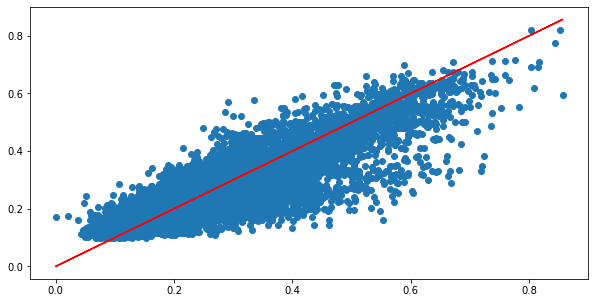

In [32]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [33]:
y_pred_2 = []
for pred in y_pred:
  y_pred_2.append(pred[0])

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2})
df1 = df.head(20)
df1

,Actual,Predicted
75439,0.234830,0.230103
15416,0.117310,0.160890
24537,0.200839,0.196880
33177,0.189699,0.181931
49716,0.107778,0.173472
770,0.109540,0.144373
26407,0.182963,0.178125
701,0.277325,0.226857
55778,0.205526,0.217904
35288,0.156143,0.175970


In [22]:
#Model 3: K Nearest Neighbours

In [23]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')

In [24]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='brute')

In [25]:
predictions = knn.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = mse ** (1/2)
print(rmse)

0.055634082139484564


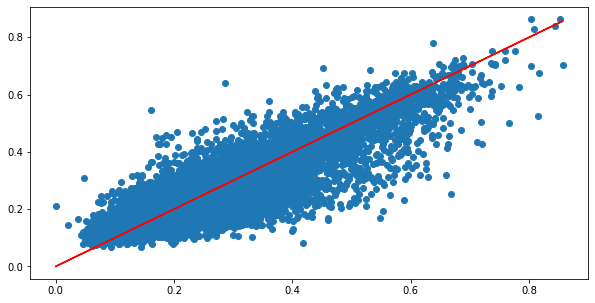

In [27]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1 = df.head(20)
df1

,Actual,Predicted
75439,0.234830,0.232833
15416,0.117310,0.263648
24537,0.200839,0.206308
33177,0.189699,0.174376
49716,0.107778,0.209876
770,0.109540,0.119244
26407,0.182963,0.186716
701,0.277325,0.210990
55778,0.205526,0.217068
35288,0.156143,0.145694
